### Normal2FormationBoreholeResistivityCorrection
Script to determine formation resistivity given borehole fluid conductivity, borehole diameter, and apparent normal resistivity at a given separation.  Assumes tool is centralized.Uses polynomial formula from USGS pub, based on Schlumberger correction.
https://www.usgs.gov/publications/a-fortran-algorithm-correcting-normal-resistivity-logs-borehole-diameter-and-mud

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_in = 'NormalResisitivityLAS/36000502wNormalRes.las' # Note that the path will need to be corrected.
df = pd.read_csv(file_in, sep='\s+', skiprows=31)
df.replace(-99999.0, np.NaN, inplace=True)
# Comment out one of the two lines below to set the other for fluid resistivity.
df['F-RES'] = 1/(df.COND_*1e-6*100) # Use this line if fluid conductivity was recorded.
#df['F-RES'] = 20.0                 # Use this line if fluid conductivity is not available.

# Check to make sure that there are not bridle issues and shorts with these two measurements. The R64 measurement in thi
# record has issues.  It's likely that the bridle shorted.
# df["R32"] = np.NaN                # Can turn off measurements here.
# df["R64"] = np.NaN

D=2.7  # borehole diameter in inches. This example is from a corehole.

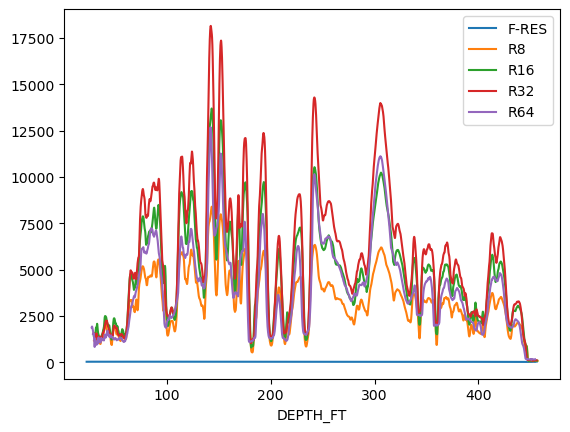

In [3]:
ax1 = df.plot(x='DEPTH_FT',
                      y= ["F-RES","R8","R16","R32","R64"],
                      #ylim = (0,100),
                      #xlim = (100,350)
                     )

### Calculate correction factors. 
Individual constants used in calbration

In [4]:

df["x1_8"] = np.log(df["R8"]/df["F-RES"])
df["x1_16"] = np.log(df["R16"]/df["F-RES"])
df["x1_32"] = np.log(df["R32"]/df["F-RES"])
df["x1_64"] = np.log(df["R64"]/df["F-RES"])

x2_8 = np.log(8/D)
x2_16 = np.log(16/D)
x2_32 = np.log(32/D)
x2_64 = np.log(64/D)

df["x3_8"] = df["x1_8"]*x2_8
df["x3_16"] = df["x1_16"]*x2_16
df["x3_32"] = df["x1_32"]*x2_32
df["x3_64"] = df["x1_64"]*x2_64

Using the calibration constants and polynomial correction to create adjusted resistivities.

In [5]:
df['S8'] = (0.015270453*np.power(df['x1_8'],3) - 0.065033900*np.power(df['x1_8'],2) + 1.2427109*df['x1_8']
- 0.0031720250*np.power(x2_8,4) - 0.022673233*np.power(x2_8,3) + 0.12836914*np.power(x2_8,2)
- 0.056806217*x2_8 - 0.0033741998*np.power(df['x1_8'],2)*df['x3_8'] + 0.0020463816*np.power(x2_8,2)*df['x3_8']
+ 0.059729697*x2_8*df['x3_8'] - 0.24143625*df['x3_8'] - 0.13580321)
df['Rt_8'] = df['F-RES'] * np.exp(df['S8'])

df['S16'] = (0.015270453*np.power(df['x1_16'],3) - 0.065033900*np.power(df['x1_16'],2) + 1.2427109*df['x1_16']
- 0.0031720250*np.power(x2_16,4) - 0.022673233*np.power(x2_16,3) + 0.12836914*np.power(x2_16,2)
- 0.056806217*x2_16 - 0.0033741998*np.power(df['x1_16'],2)*df['x3_16'] + 0.0020463816*np.power(x2_16,2)*df['x3_16']
+ 0.059729697*x2_16*df['x3_16'] - 0.24143625*df['x3_16'] - 0.13580321)
df['Rt_16'] = df['F-RES'] * np.exp(df['S16'])

df['S32'] = (0.015270453*np.power(df['x1_32'],3) - 0.065033900*np.power(df['x1_32'],2) + 1.2427109*df['x1_32']
- 0.0031720250*np.power(x2_32,4) - 0.022673233*np.power(x2_32,3) + 0.12836914*np.power(x2_32,2)
- 0.056806217*x2_32 - 0.0033741998*np.power(df['x1_32'],2)*df['x3_32'] + 0.0020463816*np.power(x2_32,2)*df['x3_32']
+ 0.059729697*x2_32*df['x3_32'] - 0.24143625*df['x3_32'] - 0.13580321)
df['Rt_32'] = df['F-RES'] * np.exp(df['S32'])

df['S64'] = (0.015270453*np.power(df['x1_64'],3) - 0.065033900*np.power(df['x1_64'],2) + 1.2427109*df['x1_64']
- 0.0031720250*np.power(x2_64,4) - 0.022673233*np.power(x2_64,3) + 0.12836914*np.power(x2_64,2)
- 0.056806217*x2_64 - 0.0033741998*np.power(df['x1_64'],2)*df['x3_64'] + 0.0020463816*np.power(x2_64,2)*df['x3_64']
+ 0.059729697*x2_64*df['x3_64'] - 0.24143625*df['x3_64'] - 0.13580321)
df['Rt_64'] = df['F-RES'] * np.exp(df['S64'])
df

,DEPTH_FT,R8,R16,R32,R64,COND_,F-RES,x1_8,x1_16,x1_32,...,x3_32,x3_64,S8,Rt_8,S16,Rt_16,S32,Rt_32,S64,Rt_64
0,6.8720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.9718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7.0716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.1714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7.2712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508,456.7700,70.9358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4509,456.8700,70.8688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4510,456.9700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4511,457.0700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Check on correction
This correction assumes that the fluid resistivity is less than the formation resistivity ( Rt/Rm >_ 1 ).  This is checked below.  If false then the other equation (see below in Old Stuff for equation) will need to used for the interval where Rt/Rm < 1.

Text(0.5, 1.0, 'Corrected formation resistivity for 36000502wNormalRes.las')

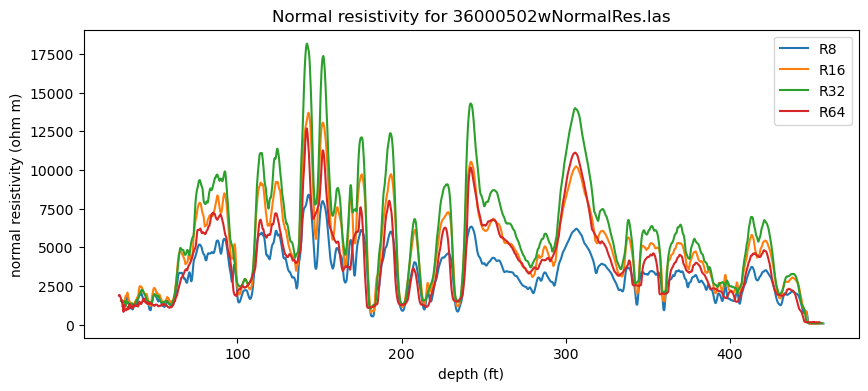

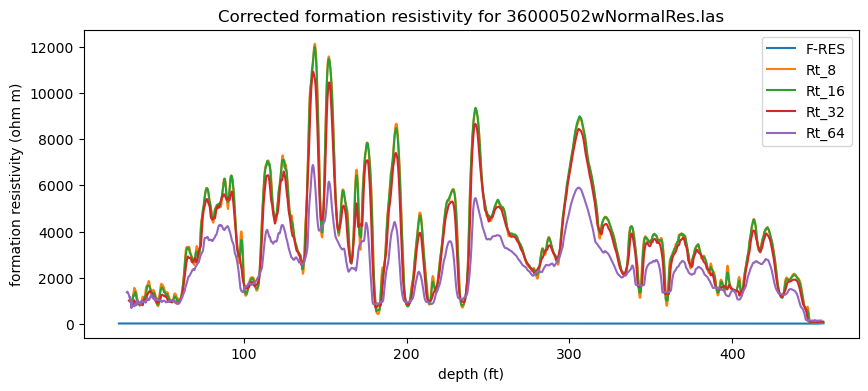

In [7]:
boring_name = file_in.replace("NormalResisitivityLAS/","")
ax1 = df.plot(x='DEPTH_FT',
              y= ['R8','R16','R32','R64'],
              figsize = (10,4))
ax1.set_xlabel('depth (ft)')
ax1.set_ylabel('normal resistivity (ohm m)')
ax1.set_title('Normal resistivity for '+ boring_name)

ax2 = df.plot(x='DEPTH_FT',
                      y= ['F-RES','Rt_8','Rt_16','Rt_32','Rt_64'],
                      figsize = (10,4))
ax2.set_xlabel('depth (ft)')
ax2.set_ylabel('formation resistivity (ohm m)')
ax2.set_title('Corrected formation resistivity for '+ boring_name)

### Check on correction¶
This correction assumes that the fluid resistivity is less than the formation resistivity ( Rt/Rm >_ 1 ). Look to see if the fluid resistivity (F-RES_) is always less than the corrected formation resistivity (Rt). Could implement case where Rt/Rm>1, but have never seen it.  Could occur in formation with saline water and fresh water in boring.

## Output Result as csv

Select results to average or pick most representative. Not using R64 since it doesn't match the other corrected resistivities.


In [8]:
df['FormRes'] = df[['Rt_8', 'Rt_16', 'Rt_32']].apply(np.mean, axis = 1)

In [9]:
df['FormRes'] = df['FormRes'].fillna(-999)
file_out = file_in.replace('wNormalRes.las','wFormationRes.csv')
print(file_out)
df.to_csv(file_out, columns=['DEPTH_FT', 'FormRes'],index=False)

NormalResisitivityLAS/36000502wFormationRes.csv
